# Python AWIPS Data Access Framework

AWIPS (formerly AWIPS II or AWIPS2) is a weather forecasting display and analysis package developed by the National Weather Service and Raytheon and released as open source software by Unidata. 

AWIPS takes a unified approach to data ingest, starting with an LDM client requesting data from Unidata's IDD. Data files recevied by the LDM are decodedn by EDEX (stored as HDF5 and PostgreSQL/PostGIS metadata). In addition to the CAVE Java client, Unidata supports the [python-awips package](http://python-awips.readthedocs.io), a Data Access Framework (DAF) for requesting data from an AWIPS EDEX server. 

### Install python-awips

    pip install python-awips

Requirements: **Python >=2.7**, **Shapely >=1.4**

### From Github

    git clone https://github.com/Unidata/python-awips.git
    cd python-awips
    python setup.py install

### Install on an AWIPS system (CAVE, EDEX)

#### Using easy_install

* For Unidata AWIPS release **16.2.2+**:

        /awips2/python/bin/easy_install pip
        /awips2/python/bin/pip install python-awips
  
* For releases before and up to **16.1.5** you may need to run

        yum install awips2-python-setuptools

    

# DAF Design

The Data Access Framework is designed to provide a consistent interface for requesting and using geospatial data (for use within CAVE and EDEX). The framework supports two types of data requests: **grids** (grib, satellite, radar), and **geometries** (maps, obs, warnings, etc.)

### Supported Data Types

In [69]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
dataTypes = DataAccessLayer.getSupportedDatatypes()
for datatype in dataTypes: print(datatype)

acars
airep
binlightning
bufrmosavn
bufrmoseta
bufrmosgfs
bufrmoshpc
bufrmoslamp
bufrmosmrf
bufrmosngm
bufrua
climate
common_obs_spatial
ffmp
gfe
grid
hydro
ldadmesonet
maps
modelsounding
obs
pirep
practicewarning
profiler
radar
radar_spatial
satellite
sfcobs
warning


# Grid Inventory

Calling **newDataRequest()** and **setDatatype("grid")** we can print out the list of available grids:

In [70]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
for grid in available_grids: print(grid)

CMC
DGEX
ESTOFS
ETSS
FFG-ALR
FFG-FWR
FFG-KRF
FFG-MSR
FFG-ORN
FFG-PTR
FFG-RHA
FFG-RSA
FFG-STR
FFG-TAR
FFG-TIR
FFG-TUA
FNMOC-FAROP
GFS
GFS20
GFSGuide
GFSLAMP5
GLERL
GribModel:58:0:135
GribModel:58:0:18
GribModel:58:0:78
GribModel:9:151:172
HFR-EAST_6KM
HFR-EAST_PR_6KM
HFR-US_EAST_DELAWARE_1KM
HFR-US_EAST_FLORIDA_2KM
HFR-US_EAST_NORTH_2KM
HFR-US_EAST_SOUTH_2KM
HFR-US_EAST_VIRGINIA_1KM
HFR-US_HAWAII_1KM
HFR-US_HAWAII_2KM
HFR-US_HAWAII_6KM
HFR-US_WEST_500M
HFR-US_WEST_CENCAL_2KM
HFR-US_WEST_LOSANGELES_1KM
HFR-US_WEST_LOSOSOS_1KM
HFR-US_WEST_NORTH_2KM
HFR-US_WEST_SANFRAN_1KM
HFR-US_WEST_SOCAL_2KM
HFR-US_WEST_WASHINGTON_1KM
HFR-WEST_6KM
HPCGuide
HPCqpf
HPCqpfNDFD
HRRR
HRRRX
LAMP2p5
MOSGuide
MOSGuideExtended
MPE-Local-ALR
MPE-Local-MSR
MPE-Local-ORN
MPE-Local-RHA
MPE-Local-RSA
MPE-Local-SJU
MPE-Local-STR
MPE-Local-TAR
MPE-Local-TIR
MPE-Mosaic-ALR
MPE-Mosaic-FWR
MPE-Mosaic-MSR
MPE-Mosaic-ORN
MPE-Mosaic-RHA
MPE-Mosaic-SJU
MPE-Mosaic-TAR
MPE-Mosaic-TIR
NAM12
NAM40
NAVGEM
NCWF
NOHRSC-SNOW
NamDNG
Q

### Set grid name with `setLocationNames()`

In [71]:
request.setLocationNames("RAP40")

# List Available Parameters for a Grid

This example requests the U and V wind components for the RAP 13km CONUS and plots the wind speed (total vector) as a gridded contour (color-filled isotachs, essentially), calling **getAvailableParameters()**:

In [72]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
for parm in availableParms: print(parm)

AV
BLI
CAPE
CFRZR
CICEP
CIn
CP
CP10hr
CP11hr
CP12hr
CP13hr
CP14hr
CP15hr
CP16hr
CP17hr
CP18hr
CP1hr
CP2hr
CP3hr
CP4hr
CP5hr
CP6hr
CP9hr
CRAIN
CSNOW
DpD
DpT
EPT
GH
HCDC
HINDEX
HPBL
Heli
LCDC
LTNG
LgSP
LgSP10hr
LgSP11hr
LgSP12hr
LgSP13hr
LgSP14hr
LgSP15hr
LgSP16hr
LgSP17hr
LgSP18hr
LgSP1hr
LgSP2hr
LgSP3hr
LgSP4hr
LgSP5hr
LgSP6hr
LgSP9hr
MCDC
MMSP
MSTAV
P
PLPL
PR
PVV
PW
PoT
REFD
RH
SH
SLI
SnD
T
TOTSN
TOTSN10hr
TOTSN11hr
TOTSN12hr
TOTSN13hr
TOTSN14hr
TOTSN15hr
TOTSN16hr
TOTSN17hr
TOTSN18hr
TOTSN1hr
TOTSN2hr
TOTSN3hr
TOTSN4hr
TOTSN5hr
TOTSN6hr
TOTSN9hr
TP
TP10hr
TP11hr
TP12hr
TP13hr
TP14hr
TP15hr
TP16hr
TP17hr
TP18hr
TP1hr
TP2hr
TP3hr
TP4hr
TP5hr
TP6hr
TP9hr
USTM
VSTM
VUCSH
VVCSH
Vis
WEASD
WEASD10hr
WEASD11hr
WEASD12hr
WEASD13hr
WEASD14hr
WEASD15hr
WEASD16hr
WEASD17hr
WEASD18hr
WEASD1hr
WEASD2hr
WEASD3hr
WEASD4hr
WEASD5hr
WEASD6hr
WEASD9hr
WGS
uW
vW


### setParameters()

set the request parameter

In [73]:
request.setParameters("T")

## List Available Levels for Parameter

Using **DataAccessLayer.getAvailableLevels()**

In [74]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
availableLevels.sort()
for level in availableLevels: print(level)

80.0FHAG
0.0_30.0BL
30.0_60.0BL
60.0_90.0BL
90.0_120.0BL
0.0SFC
120.0_150.0BL
1000.0MB
975.0MB
2.0FHAG
150.0_180.0BL
950.0MB
925.0MB
900.0MB
875.0MB
850.0MB
825.0MB
800.0MB
775.0MB
750.0MB
725.0MB
700.0MB
675.0MB
650.0MB
625.0MB
600.0MB
575.0MB
550.0MB
525.0MB
500.0MB
475.0MB
450.0MB
425.0MB
400.0MB
375.0MB
350.0MB
325.0MB
300.0MB
275.0MB
250.0MB
225.0MB
200.0MB
175.0MB
150.0MB
125.0MB
100.0MB
0.0TROP


* **0.0SFC** is the Surface level
* **FHAG** stands for Fixed Height Above Ground (in meters)
* **NTAT** stands for Nominal Top of the ATmosphere
* **BL** stands for Boundary Layer, where **0.0_30.0BL** reads as *0-30 mb above ground level*  
* **TROP** is the Tropopause level

### request.setLevels()

For this example we will use Surface Temperatur

In [75]:
request.setLevels("0.0SFC")

### DataAccessLayer.getAvailableTimes()

* **getAvailableTimes(request, True)** will return an object of *run times* - formatted as `YYYY-MM-DD HH:MM:SS`
* **getAvailableTimes(request)** will return an object of all times - formatted as `YYYY-MM-DD HH:MM:SS (F:ff)`

In [76]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
print(cycles[-1])

2016-10-18 21:00:00


In [77]:
times = DataAccessLayer.getAvailableTimes(request)
latest_run = []
for t in times:
    if str(t)[:19] == str(cycles[-1]):
        latest_run.append(t)

for ftime in latest_run:
    print(ftime)

2016-10-18 21:00:00 (0)
2016-10-18 21:00:00 (1)
2016-10-18 21:00:00 (2)
2016-10-18 21:00:00 (3)
2016-10-18 21:00:00 (4)
2016-10-18 21:00:00 (5)
2016-10-18 21:00:00 (6)
2016-10-18 21:00:00 (9)
2016-10-18 21:00:00 (10)
2016-10-18 21:00:00 (11)
2016-10-18 21:00:00 (12)
2016-10-18 21:00:00 (13)
2016-10-18 21:00:00 (14)
2016-10-18 21:00:00 (15)
2016-10-18 21:00:00 (16)
2016-10-18 21:00:00 (17)
2016-10-18 21:00:00 (18)


# Request a Grid


In [78]:
response = DataAccessLayer.getGridData(request, [latest_run[-1]])

In [79]:
for grid in response:
    data = grid.getRawData()
    lons, lats = grid.getLatLonCoords()
    print(str(grid.getDataTime()))
    print(data.shape)

2016-10-18 21:00:00 (18)
(151, 113)


# Plot a Grid with Matplotlib

In [80]:
%matplotlib inline
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import numpy as np
ngrid = data.shape[1]
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
              ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
              ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
               lats.flatten()), data.flatten())
rdata = tli(rlons, rlats)

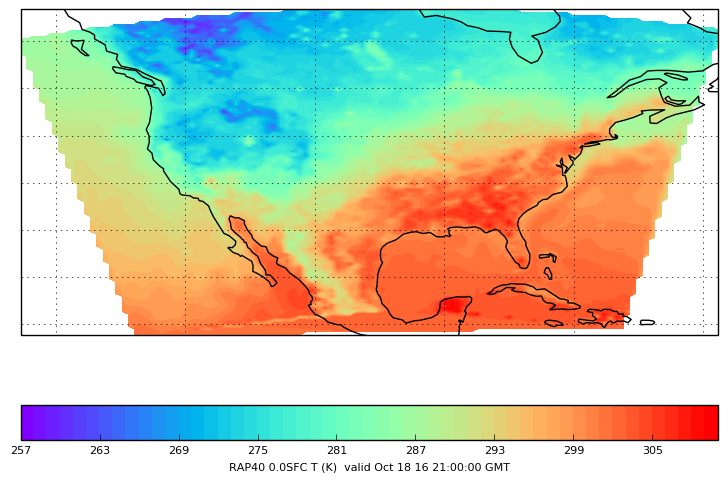

In [81]:
# Create Map
cmap = plt.get_cmap('rainbow')
matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(rlons, rlats, rdata, 60, cmap=cmap,
                  transform=ccrs.PlateCarree(),
                  vmin=rdata.min(), vmax=rdata.max())

ax.gridlines()
ax.coastlines()
ax.set_aspect('auto', adjustable=None)

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(grid.getLocationName() +" "+ grid.getLevel() + " "  + grid.getParameter() + " " \
        "(" + grid.getUnit() + ") " + " valid " + str(grid.getDataTime().getRefTime()) )


# Model Soundings

The EDEX modelsounding plugin creates 64-level vertical profiles from GFS and ETA (NAM) BUFR products distributed on NOAAport.

In [82]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("modelsounding")
request.addIdentifier("reportType", "GFS")
request.setParameters("pressure","temperature","specHum","uComp","vComp")
request.setLocationNames("OAX")

In [83]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
allTimes = DataAccessLayer.getAvailableTimes(request)

# Build one complete model run
fcstRun = []
for time in allTimes:
    if str(time)[:19] == str(cycles[-1]):
        fcstRun.append(time)

# request a single time
response = DataAccessLayer.getGeometryData(request,times=[fcstRun[0]])

print("parms    = " + str(response[0].getParameters()))
print("site     = " + response[0].getLocationName())
print("datetime = " + str(response[0].getDataTime()))
print("geom     = " + str(response[0].getGeometry()))


tmp,prs,sh,uc,vc = [],[],[],[],[]
for ob in response:
    tmp.append(float(ob.getString("temperature")))
    prs.append(float(ob.getString("pressure")))
    sh.append(float(ob.getString("specHum")))
    uc.append(float(ob.getString("uComp")))
    vc.append(float(ob.getString("vComp")))

parms    = ['pressure', 'uComp', 'temperature', 'specHum', 'vComp']
site     = OAX
datetime = 1970-01-18 02:12:50.400000 (0)
geom     = POINT (-96.37000274658203 41.31999969482422)


## Create data arrays and calculate dewpoint from spec. humidity

In [84]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import exp, log

from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile, dewpoint
from metpy.calc import get_wind_speed,get_wind_dir, thermo, vapor_pressure
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate

pres = np.array(prs)
# we can use units.* here...
t = (np.array(tmp)-273.16) * units.degC
p = np.array(pres)/100 * units.mbar
s = np.array(sh)

u,v = np.array(uc)*1.94384,np.array(vc)*1.94384 # m/s to knots
spd = get_wind_speed(u, v) * units.knots
dir = get_wind_dir(u, v) * units.deg


## Dewpoint from Specific Humidity

Because the modelsounding plugin does not return dewpoint values, we must calculate the profile ourselves.  Here are three examples of dewpoint calculated from specific humidity, including a manual calculation following NCEP AWIPS/NSHARP. 

### 1) metpy calculated mixing ratio and vapor pressure

In [85]:
rmix = (s/(1-s)) *1000 * units('g/kg')
e = vapor_pressure(p, rmix)
td = dewpoint(e)

### 2) metpy calculated assuming spec. humidity = mixing ratio

In [86]:
td2 = dewpoint(vapor_pressure(p, s))

### 3) NCEP AWIPS soundingrequest plugin
based on GEMPAK/NSHARP, from https://github.com/Unidata/awips2-ncep/blob/unidata_16.2.2/edex/gov.noaa.nws.ncep.edex.plugin.soundingrequest/src/gov/noaa/nws/ncep/edex/plugin/soundingrequest/handler/MergeSounding.java#L1783

In [87]:
# new arrays
ntmp,nprs,nsh = np.array(tmp)-273.16,np.array(prs),np.array(sh)

# where p=pressure(pa), T=temp(C), T0=reference temp(273.16)
rh = 0.263*nprs*nsh / (np.exp(17.67*ntmp/(ntmp+273.16-29.65)))
vaps =  6.112 * np.exp((17.67 * ntmp) / (ntmp + 243.5))
vapr = rh * vaps / 100
dwpc = np.array(243.5 * (np.log(6.112) - np.log(vapr)) / (np.log(vapr) - np.log(6.112) - 17.67)) * units.degC

/awips2/python/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/awips2/python/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


In [88]:
print(min(td), max(td))
print(min(td2), max(td2))
print(min(dwpc), max(dwpc))

(<Quantity(-104.835479369, 'degC')>, <Quantity(7.70363661462, 'degC')>)
(<Quantity(-104.835568744, 'degC')>, <Quantity(7.60396920971, 'degC')>)
(<Quantity(-104.83679933, 'degC')>, <Quantity(7.76243707954, 'degC')>)


## Plot with MetPy

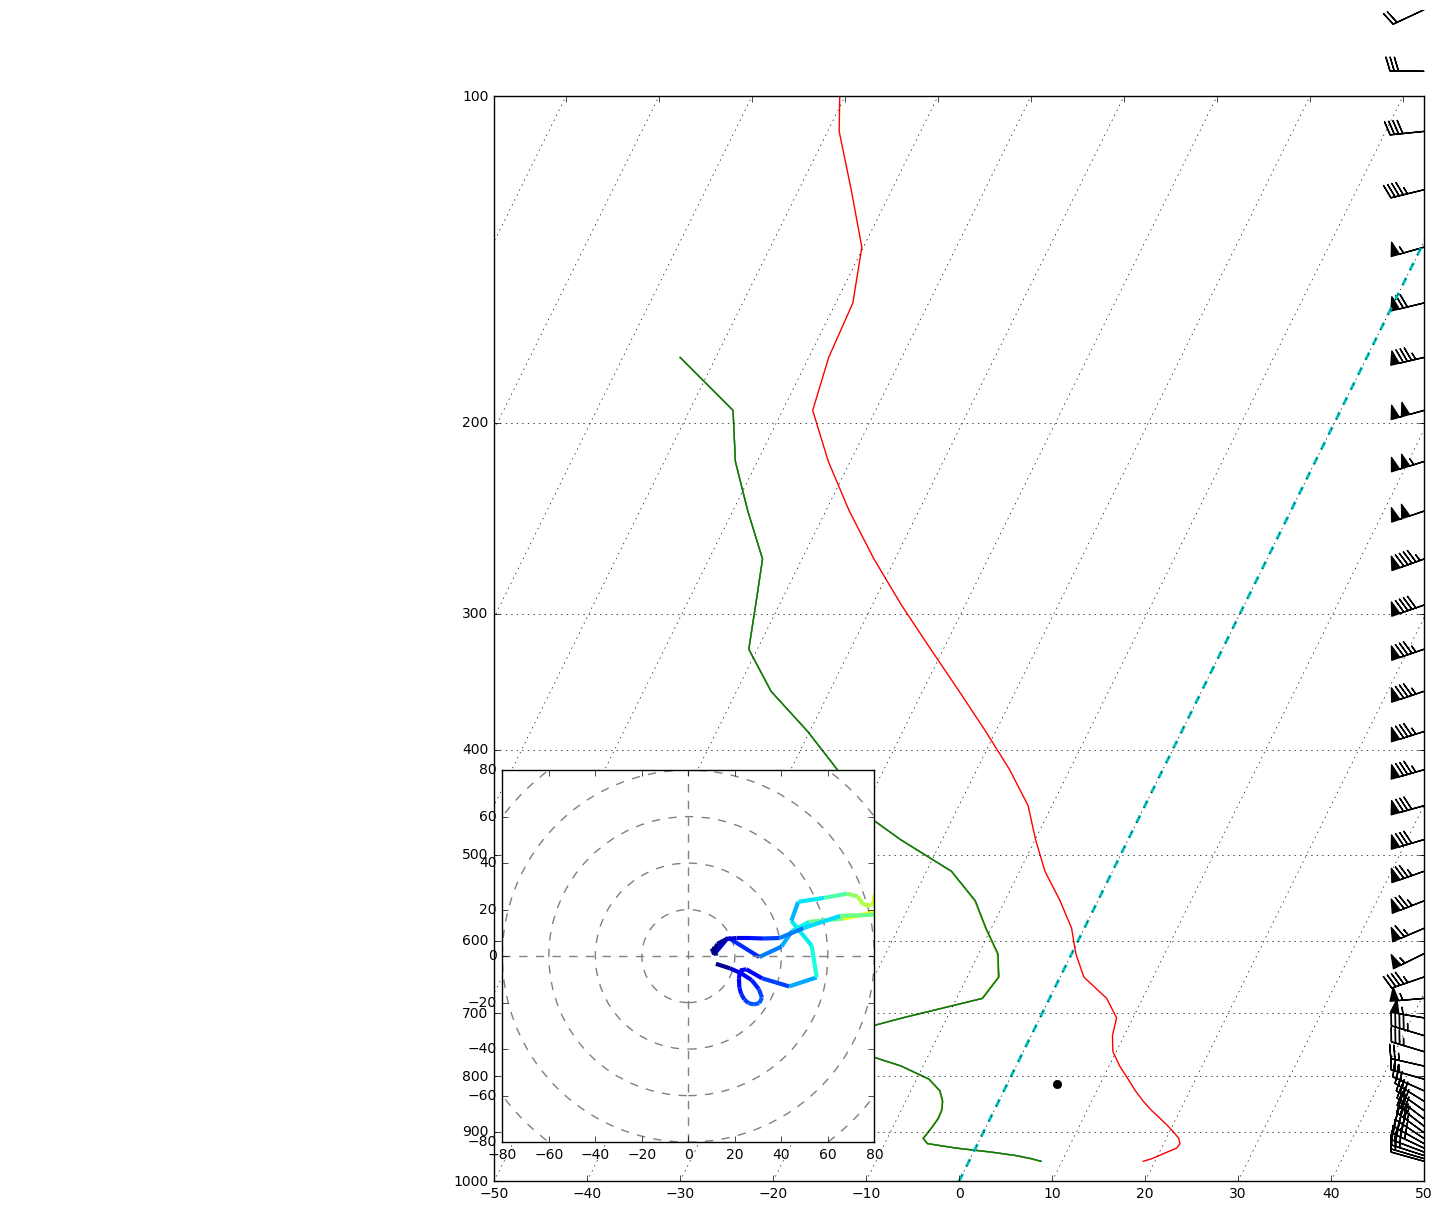

In [89]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 14)

# Create a skewT plot
skew = SkewT()

# Plot the data
skew.plot(p, t, 'r')
skew.plot(p, td, 'b')
skew.plot(p, td2, 'y')
skew.plot(p, dwpc, 'g')

skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], t[0], td[0])
lcl_temp = dry_lapse(concatenate((p[0], l)), t[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Draw hodograph
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=3)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)

# Show the plot
plt.show()

# Synop/Marine Obs

In [90]:
from awips.dataaccess import DataAccessLayer

request = DataAccessLayer.newDataRequest()
request.setDatatype("sfcobs")
request.setLocationNames("72421") # Covington, Kentucky (KCVG)

request.setParameters("stationId","timeObs","elevation","reportType",
                  "wx_present","visibility","seaLevelPress","stationPress",
                  "pressChange3Hour","pressChangeChar","temperature",
                  "dewpoint","seaSurfaceTemp","wetBulb","windDir",
                  "windSpeed","equivWindSpeed10m","windGust","precip1Hour",
                  "precip6Hour","precip24Hour" )

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

['windDir', 'pressChange3Hour', 'elevation', 'temperature', 'wetBulb', 'wx_present', 'stationPress', 'visibility', 'dewpoint', 'stationId', 'precip1Hour', 'equivWindSpeed10m', 'windSpeed', 'pressChangeChar', 'windGust', 'timeObs', 'reportType', 'precip6Hour', 'precip24Hour', 'seaSurfaceTemp', 'seaLevelPress']


# Profiler

In [91]:
MULTI_DIM_PARAMS = set(['vComponent', 'uComponent', 'peakPower', 
                            'levelMode', 'uvQualityCode', 'consensusNum', 
                            'HorizSpStdDev', 'wComponent', 'height', 
                            'VertSpStdDev'])

request = DataAccessLayer.newDataRequest("profiler")
request.setParameters('numProfLvls', 'elevation', 'windDirSfc', 'validTime', 
                  'windSpeedSfc', 'pressure', 'submode', 'relHumidity', 
                  'profilerId', 'rainRate', 'temperature')
request.getParameters().extend(MULTI_DIM_PARAMS)

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())


['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', 'VertSpStdDev']
['vComponent', 'uComponent', 'peakPower', 'levelMode', 'uvQualityCode', 'consensusNum', 'HorizSpStdDev', 'wComponent', 'height', '

# ACARS

In [92]:
request = DataAccessLayer.newDataRequest("acars")
request.setParameters("tailNumber", "receiver", "pressure", "flightPhase", 
                  "rollAngleQuality", "temp", "windDirection", "windSpeed",
                  "humidity", "mixingRatio", "icing")
datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

['flightPhase', 'icing', 'temp', 'humidity', 'pressure', 'windSpeed', 'receiver', 'mixingRatio', 'windDirection', 'rollAngleQuality', 'tailNumber']


# AIREP

In [93]:
request = DataAccessLayer.newDataRequest("airep")
request.setParameters("id", "flightLevel", "temp", "windDirection", "windSpeed",
                  "flightWeather", "flightHazard", "flightConditions")

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:


['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard', 'flightConditions', 'windSpeed', 'flightLevel', 'id']
['flightWeather', 'flightHazard'

# PIREP

In [94]:
MULTI_DIM_PARAMS = set(["hazardType", 
                        "turbType", "turbBaseHeight", "turbTopHeight",
                        "iceType", "iceBaseHeight", "iceTopHeight",
                        "skyCover1", "skyCover2", "skyBaseHeight", "skyTopHeight"
                        ])
    
request = DataAccessLayer.newDataRequest("pirep")
request.setParameters('id', 'flightLevel', 'temp', 'windDirection', 'windSpeed',
                  'horzVisibility', 'aircraftType', 'weatherGroup')
request.getParameters().extend(MULTI_DIM_PARAMS)

datatimes = DataAccessLayer.getAvailableTimes(request)
time = datatimes[-1].validPeriod

response = DataAccessLayer.getGeometryData(request,times=time)
for ob in response:
    print(ob.getParameters())

['skyTopHeight', 'skyBaseHeight', 'turbTopHeight', 'iceBaseHeight', 'skyCover1', 'turbBaseHeight', 'iceType', 'iceTopHeight', 'turbType', 'hazardType', 'skyCover2']
['skyTopHeight', 'skyBaseHeight', 'turbTopHeight', 'iceBaseHeight', 'skyCover1', 'turbBaseHeight', 'iceType', 'iceTopHeight', 'turbType', 'hazardType', 'skyCover2']
['horzVisibility', 'weatherGroup', 'windSpeed', 'aircraftType', 'flightLevel', 'id']


# NEXRAD Level 3 Plot with Matplotlib

('using time', '2016-10-18 22:20:10')
('buffer by', 60)
('using range', (Oct 18 16 22:19:10 , Oct 18 16 22:21:10 ))
('found', 94, <DataTime instance: 2016-10-18 22:20:10 >)
('found', 99, <DataTime instance: 2016-10-18 22:20:10 >)


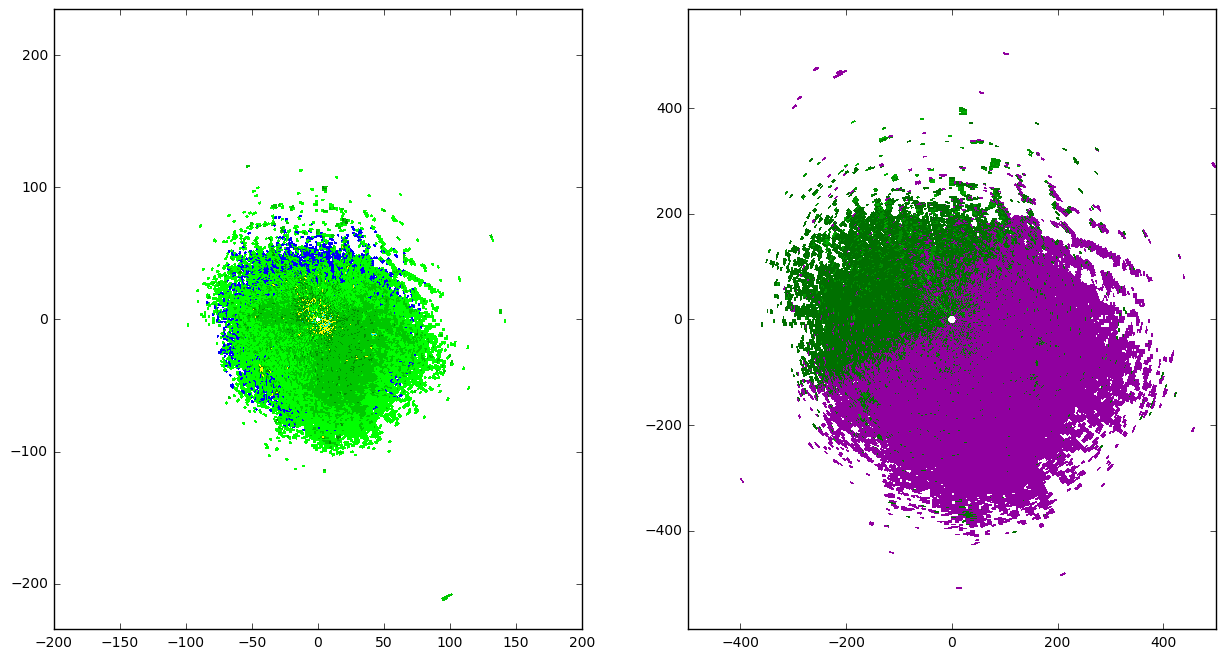

In [95]:
%matplotlib inline
from awips import ThriftClient, RadarCommon

from dynamicserialize.dstypes.com.raytheon.uf.common.time import TimeRange
from dynamicserialize.dstypes.com.raytheon.uf.common.dataplugin.radar.request import GetRadarDataRecordRequest

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

# use metpy for color table
from metpy.plots import ctables

# Set EDEX server and radar site
edex = "edex-cloud.unidata.ucar.edu"
site = "koax"
DataAccessLayer.changeEDEXHost(edex)
request = DataAccessLayer.newDataRequest()
request.setDatatype("radar")
request.setLocationNames(site)

datatimes = DataAccessLayer.getAvailableTimes(request)

# Get last available time
timerange = datatimes[-1].validPeriod
dateTimeStr = str(datatimes[-1])

# Buffer length in seconds
buffer = 60
dateTime = datetime.strptime(dateTimeStr, "%Y-%m-%d %H:%M:%S")
beginRange = dateTime - timedelta(0, buffer)
endRange = dateTime + timedelta(0, buffer)
timerange = TimeRange(beginRange, endRange)

print("using time",dateTimeStr)
print("buffer by",buffer)
print("using range",timerange)

client = ThriftClient.ThriftClient(edex)
request = GetRadarDataRecordRequest()
request.setRadarId(site)
request.setPrimaryElevationAngle("0.5")
request.setTimeRange(timerange)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for v, ctable, ax in zip((94, 99), ('NWSReflectivity', 'NWSVelocity'), axes):
    request.setProductCode(v)
    response = client.sendRequest(request)
    if response.getData():
        for record in response.getData():
            idra = record.getHdf5Data()
            rdat,azdat,depVals,threshVals = RadarCommon.get_hdf5_data(idra)
            dim = rdat.getDimension()
            yLen,xLen = rdat.getSizes()
            array = rdat.getByteData()
            
            # get data for azimuth angles if we have them.
            if azdat :
                azVals = azdat.getFloatData()
                az = np.array(RadarCommon.encode_radial(azVals))
                dattyp = RadarCommon.get_data_type(azdat)
                az = np.append(az,az[-1])
                
            print("found",v,record.getDataTime())

            header = RadarCommon.get_header(record, format, xLen, yLen, azdat, "description")
            rng = np.linspace(0, xLen, xLen + 1)
            xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
            ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))
            multiArray = np.reshape(array, (-1, xLen))
            data = ma.array(multiArray)
            data[data==0] = ma.masked

            # Plot the data
            norm, cmap = ctables.registry.get_with_steps(ctable, 16, 16)
            ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap)
            ax.set_aspect('equal', 'datalim')
            
            multp = 100*(2*xLen/460)
            ax.set_xlim(-multp,multp)
            ax.set_ylim(-multp,multp)
            # This is setting x/ylim on gate/pixel and not km


plt.show()